## **Diamonds analysis**

This project concerns a diamonds price prediction and is intented to give the answer what factors affect their price the most. It includes data analysis, data preparation and modelling with few regression algorithms.

The dataset can be found at Kaggle (https://www.kaggle.com/shivam2503/diamonds) and contains data about diamond specifications of 56000 diamonds which have been widely used for analysis. It consists of the following features:

- **price** - given in US dollars (\$326--\$18,823);
- **carat** - weight of the diamond (0.2--5.01);
- **cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal);
- **color** - diamond colour, from J (worst) to D (best);
- **clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best));
- **x** - length in mm (0--10.74);
- **y** - width in mm (0--58.9);
- **z** - depth in mm (0--31.8);
- **depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79);
- **table** - width of top of diamond relative to widest point (43--95).
   


### **Importing and reading the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#we do not want to see any warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn models to test
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

#xgboost model
from xgboost import XGBRegressor

In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/diamonds"

/content/drive/My Drive/Colab Notebooks/diamonds


In [ ]:
ls

diamonds.csv


First observations:

In [ ]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### **Data cleaning**

In [ ]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


One can see that it is not possible that Length or Width or Height could have zero value. So let us take a look how many rows have zero value.

In [ ]:
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

20

I see that there are 20 rows with 'zero' value, so I will drop them.

In [ ]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

In [ ]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
diamonds.shape

(53920, 11)

In [ ]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

One can see that there are no missing values.

Dropping unnecessary columns:

In [ ]:
diamonds=diamonds.drop('Unnamed: 0',axis=1)

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### **Data analysis**

**Histogram Charts for numerical variables**

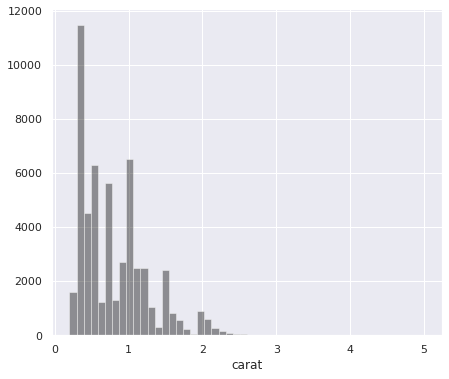

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['carat'], kde= False,color= 'black')
plt.show()

**The Histogram Chart** confirms that the distribution of **carat** is slightly skewed left with a peak.

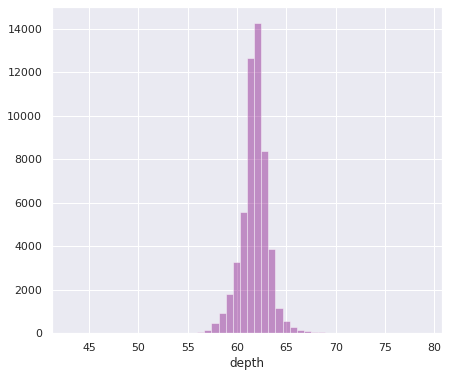

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['depth'], kde= False,color= 'purple')
plt.show()

**The Histogram Chart** confirms that the distribution of **depth** is slightly skewed right with a peak.

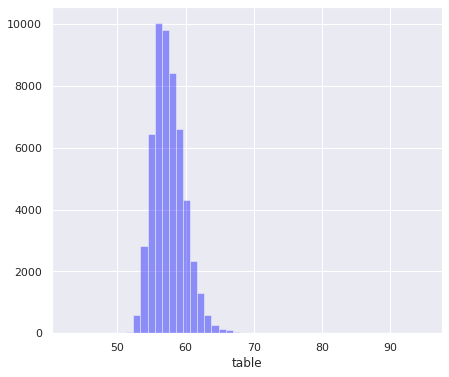

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['table'], kde= False,color= 'blue')
plt.show()

**The Histogram Chart** confirms that the distribution of **table** is slightly skewed left with a peak.

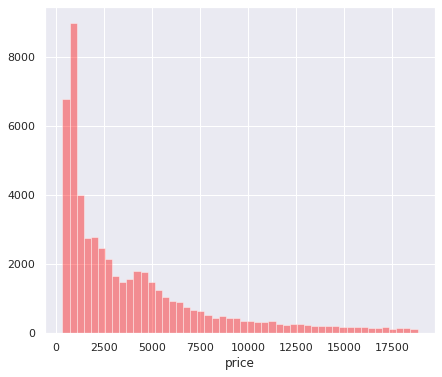

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['price'], kde= False,color= 'red')
plt.show()

**The Histogram Chart** confirms that the distribution of **price** is slightly skewed left with a peak.

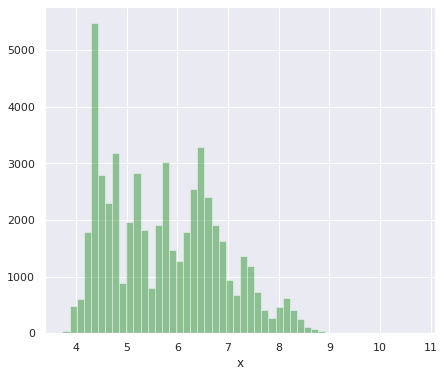

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['x'], kde= False,color= 'green')
plt.show()

**The Histogram Chart** confirms that the distribution of **x** is almost normally skewed with a peak.

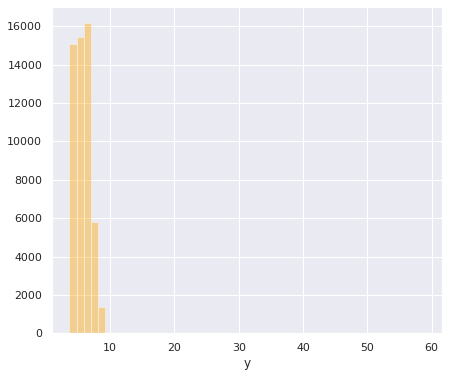

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['y'], kde= False,color= 'orange')
plt.show()

**The Histogram Chart** confirms that the distribution of **y** is slightly skewed left with a peak.

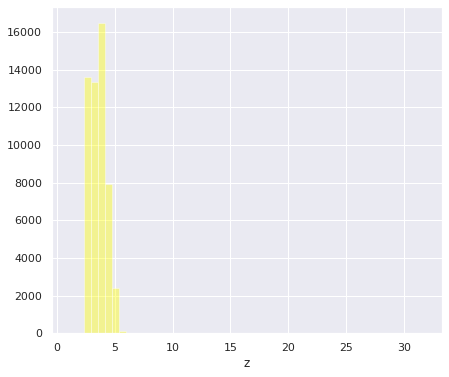

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(diamonds['z'], kde= False,color= 'yellow')
plt.show()

**The Histogram Chart** confirms that the distribution of **z** is slightly skewed left with a peak.

### **Box and violin Charts to checking for outliers in numerical variables**

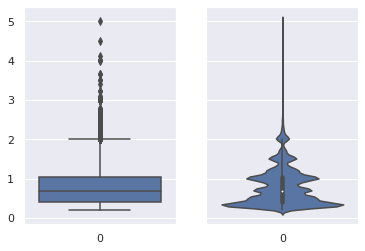

In [ ]:
#checking for outliers in the carat column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['carat'], ax=axes[0]);
sns.violinplot(data=diamonds['carat'], ax=axes[1]);

From box and violin plots one can see that most diamonds have weight between 0.5 and 1.1. But there are few unique diamonds that are greater than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

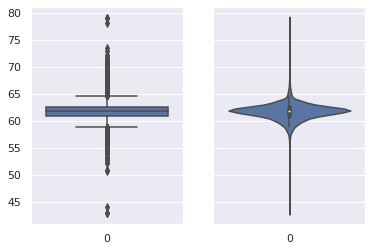

In [ ]:
#checking for outliers in the depth column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['depth'], ax=axes[0]);
sns.violinplot(data=diamonds['depth'], ax=axes[1]);

From box and violin plots one can see that most diamonds have depth between 61 and 63, but there are few having very small depth (near 40) or very high depth (near 80). Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

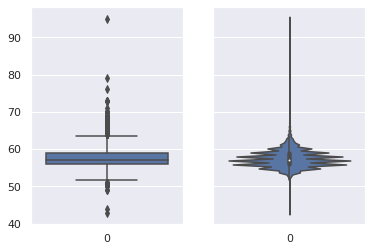

In [ ]:
#checking for outliers in the table column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['table'], ax=axes[0]);
sns.violinplot(data=diamonds['table'], ax=axes[1]);

From box and violin plots one can see that most of diamonds have width of top of diamond relative to widest point between 57 - 60 but there are few diamonds with width of top of diamond very low (near 40) or very high (near 93). Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

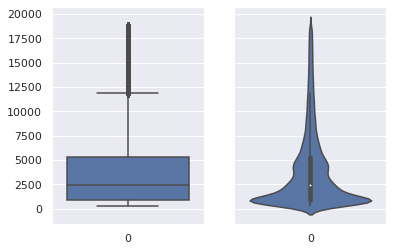

In [ ]:
#checking for outliers in the price column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['price'], ax=axes[0]);
sns.violinplot(data=diamonds['price'], ax=axes[1]);

From box and violin plots one can see that most of diamonds have price between 500 - 5000 US but there are few diamonds with very high price reached almost 20000 US. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

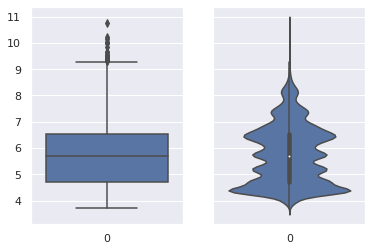

In [ ]:
#checking for outliers in the x column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['x'], ax=axes[0]);
sns.violinplot(data=diamonds['x'], ax=axes[1]);

From box and violin plots one can see that most of diamonds have the same length between 4.5 - 6.5 but there are few diamonds with greater length than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

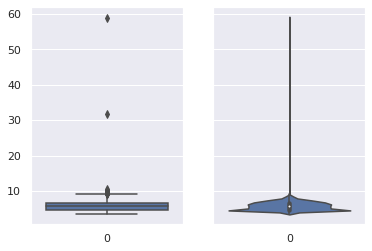

In [ ]:
#checking for outliers in the y column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['y'], ax=axes[0]);
sns.violinplot(data=diamonds['y'], ax=axes[1]);

From box and violin plots one can see that most of diamonds have the same width between 5 - 7 but there are few diamonds with greater width than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

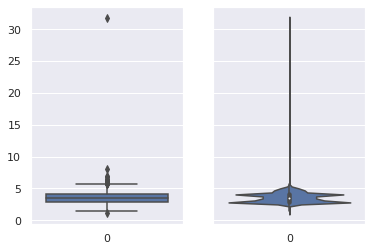

In [ ]:
#checking for outliers in the z column
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=diamonds['z'], ax=axes[0]);
sns.violinplot(data=diamonds['z'], ax=axes[1]);

From box and violin plots one can see that most of diamonds have the same depth between 3 - 4.5 but there are few diamonds with greater depth than the rest. Additionally one can see that the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.


**Pie Charts for our non-numerical features**

Now let us look at the non-numerical features of analyzed diamonds

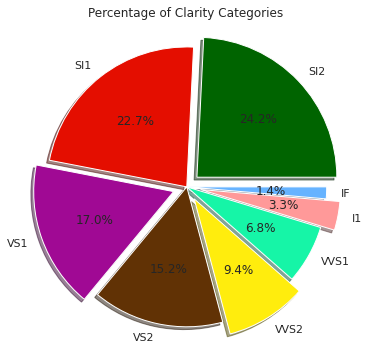

In [ ]:
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Most of diamonds have clarity SI2 (over 24.2 %) while there are only a few having the best clarity IF (over 1.4 %) and the worst clarity I1 (over 3.3 %).

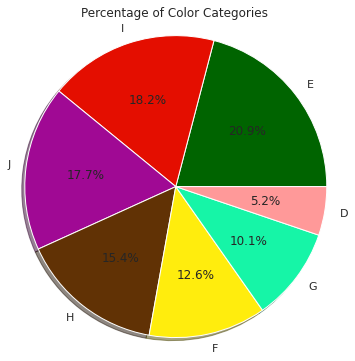

In [ ]:
labels = diamonds.color.unique().tolist()
sizes = diamonds.color.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1)
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Color Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Most of diamonds have color E (over 20.9 %) while there are only a few having the best color D (over 5.2 %). The worst color J have over 17.7 % of analyzed diamonds.

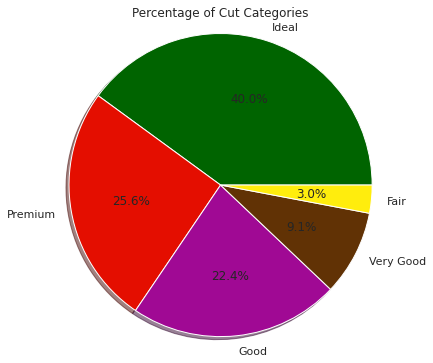

In [ ]:
labels = diamonds.cut.unique().tolist()
sizes = diamonds.cut.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Cut Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Most of diamonds have ideal cut equal to 40.0 % while there are only a few having the fair cut (3.0 %).

####**Bivariate visualization**

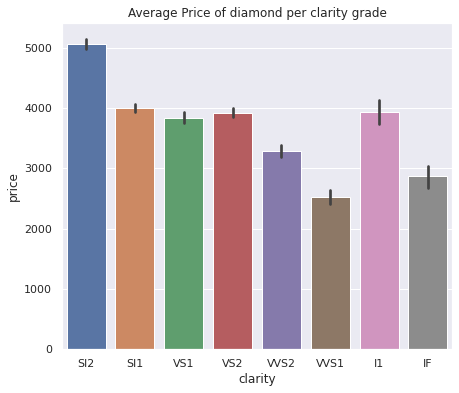

In [ ]:
sns.barplot(x="clarity", y="price", data=diamonds)
plt.title("Average Price of diamond per clarity grade")
plt.show()

**The highest** priced clarity is **SI2** while **the least** priced clarity is **VVS1**.

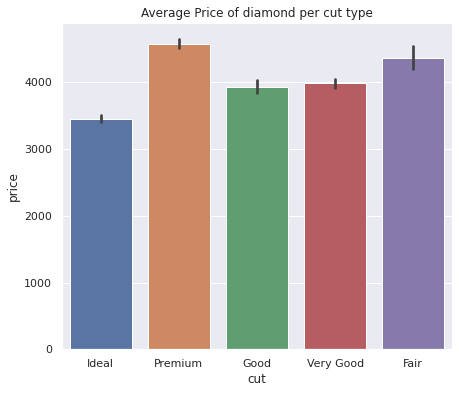

In [ ]:
sns.barplot(x="cut", y="price", data=diamonds)
plt.title("Average Price of diamond per cut type")
plt.show()

**The highest** priced cut is **Premium** cut while **the lowest** priced cut is **Ideal** cut.

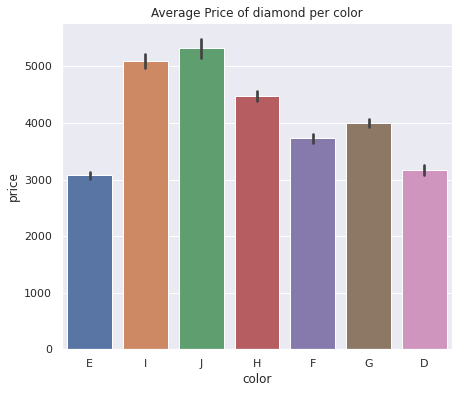

In [ ]:
sns.barplot(x="color", y="price", data=diamonds)
plt.title("Average Price of diamond per color")
plt.show()

**The highest** priced diamonds are diamonds of **J** color while **the lowest** priced diamonds are diamonds of **E** color.

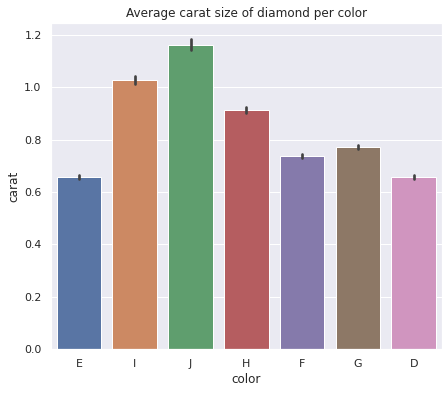

In [ ]:
sns.barplot(x="color", y="carat", data=diamonds)
plt.title("Average carat size of diamond per color")
plt.show()

**The highest** carat diamonds are of **J** color while **the smallest** carat dimonds are of **D** color.

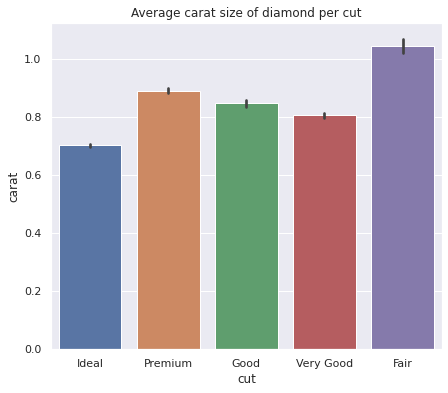

In [ ]:
sns.barplot(x="cut", y="carat", data=diamonds)
plt.title("Average carat size of diamond per cut")
plt.show()

**The highest** carat diamonds are of **Fair** cut while **the smallest** carat diamonds are of **Ideal** cut.


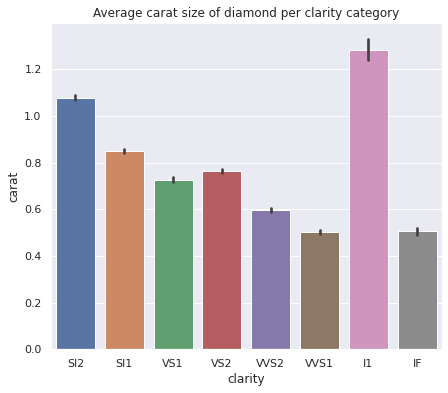

In [ ]:
sns.barplot(x="clarity", y="carat", data=diamonds)
plt.title("Average carat size of diamond per clarity category")
plt.show()

**The highest** carat diamonds are of **I1** clarity while **the smallest** carat diamonds are of **VVS1** clarity.

####**Multivariate visualization**

**To get more insights** into co-correlations between **all features** I may plot a **heat map** of them:

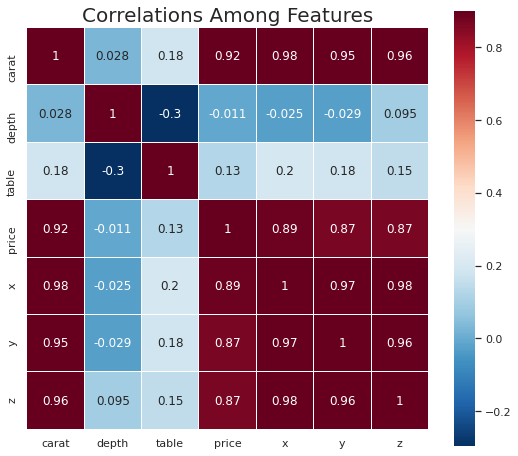

In [ ]:
plt.subplots(figsize = (9,8))
sns.heatmap(diamonds.corr(),
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1,
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

Let us check a few choosen form above features to view their relationship:


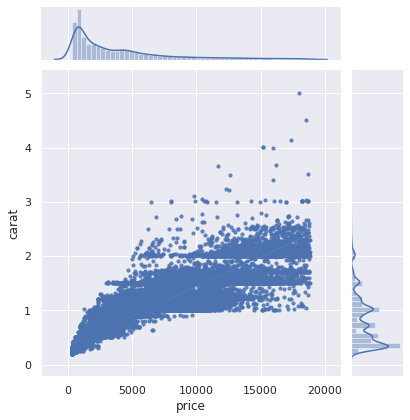

In [ ]:
#Create a new dataframe containing only price and carat columns to visualize their co-relations
fixedPrice_carat = diamonds[['price', 'carat']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridD = sns.JointGrid(x="price", y="carat", data=fixedPrice_carat, height=6)

#Draws a regression plot in the grid
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridD = gridD.plot_marginals(sns.distplot)

This scatter-plot shows how the values of carat change with changing price levels. One can see that, as price levels increase, the carat levels also increase. It is true, since more expensive diamonds generally have higher weight.

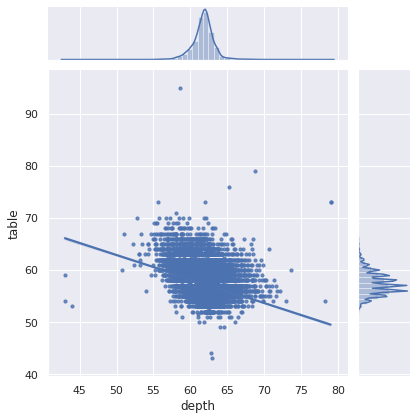

In [ ]:
#Create a new dataframe containing only depth and table columns to visualize their co-relations
fixedDepth_table = diamonds[['depth', 'table']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridD = sns.JointGrid(x="depth", y="table", data=fixedDepth_table, height=6)

#Draws a regression plot in the grid
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridD = gridD.plot_marginals(sns.distplot)

This scatter-plot shows how the values of width of top of diamond relative to widest point change with changing depth levels. One can see that, as depth levels increase, the width of top of diamond relative to widest point levels drop what is true.

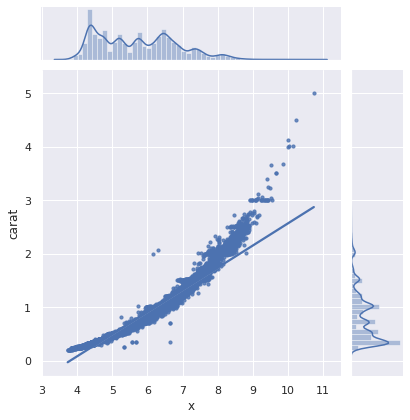

In [ ]:
#Create a new dataframe containing only x and carat columns to visualize their co-relations
fixedX_carat = diamonds[['x', 'carat']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridD = sns.JointGrid(x="x", y="carat", data=fixedX_carat, height=6)

#Draws a regression plot in the grid
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridD = gridD.plot_marginals(sns.distplot)

This scatter-plot shows how the values of carat change with changing length levels. One can see that, as length levels increase, the carat levels also increase. It is true, diamonds of greater weight have a greater length.

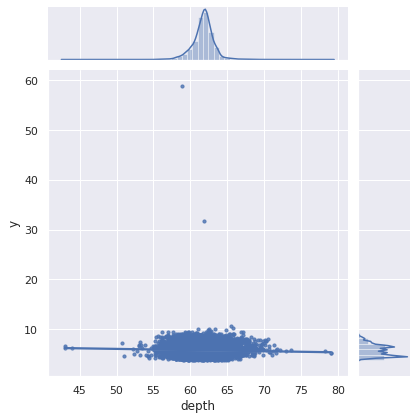

In [ ]:
#Create a new dataframe containing only depth and y columns to visualize their co-relations
fixedDepth_y = diamonds[['depth', 'y']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridD = sns.JointGrid(x="depth", y="y", data=fixedDepth_y, height=6)

#Draws a regression plot in the grid
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridD = gridD.plot_marginals(sns.distplot)

*This* scatter-plot shows how the values of width change with changing depth levels. One can see that, as depth levels increase, the width levels drop what is true.

Finally I am plotting a **pairplot**  of the dataset to observe what it **tells us**:

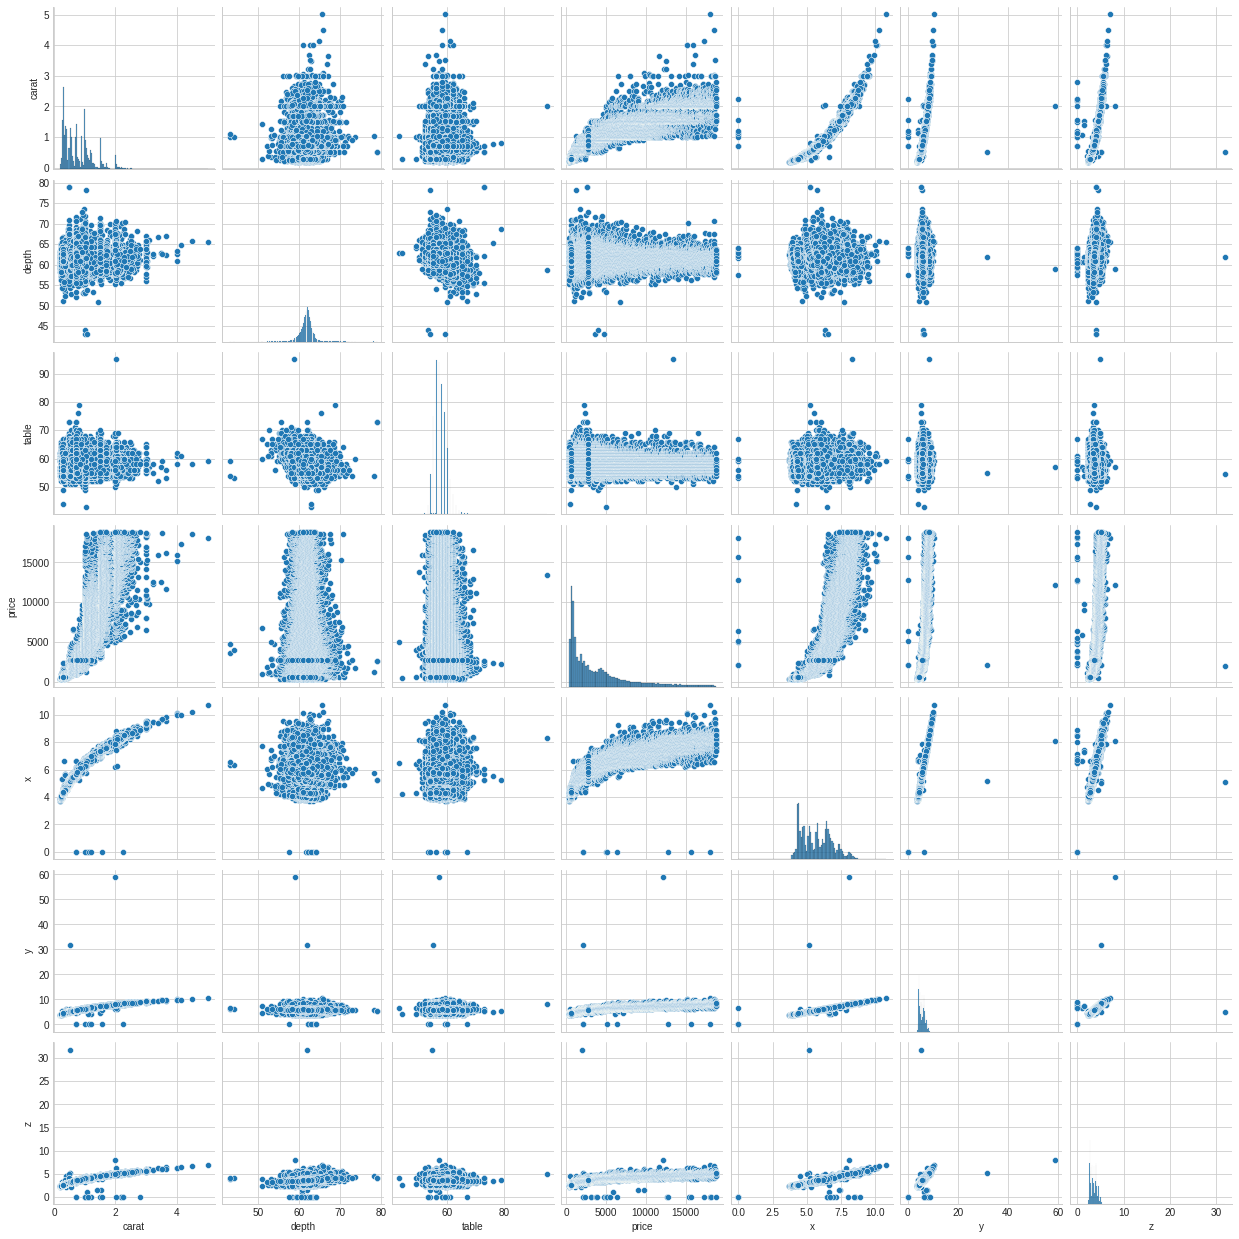

In [ ]:
sns.pairplot(diamonds);

### **Feature Engineering**

I start with creation a new column called 'volume'.

In [ ]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


Since the the shape of a diamond does not allow to calculate the volume just by multiplying xyz, I have decided to calculate the volume from density instead.

In [ ]:
diamonds['volume_from_density'] = diamonds['carat']/15.755
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,volume_from_density
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.014599
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.013329
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.014599
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.018407
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.019676


I change non numerical values into numerical ones with "get_dummies" function.

In [ ]:
diamonds_new= pd.get_dummies(diamonds,prefix_sep='_',drop_first=True)

In [ ]:
diamonds_new.head()

,carat,depth,table,price,x,y,z,volume,volume_from_density,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.014599,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.013329,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.014599,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.018407,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.019676,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


###**Data preparation to build the Machine Learning model**

I start with splitting our data into features and target label.


In [ ]:
X=diamonds_new.drop('price', axis=1)
y=diamonds_new['price']

Next I split the data into training and testing sets and show the result of the splitting:


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", train_X.shape, train_y.shape)
print("Test set:", test_X.shape, test_y.shape)

Training set: (43136, 25) (43136,)
Test set: (10784, 25) (10784,)


The values of particular feature might have different scales. So I may convert them on the same scale for better analysis and prediction. For this purpose I use a Standard Scaler function.

In [ ]:
sc = StandardScaler()

train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

###**Regression models**

I will use different types of regression models and I will see which of them work the best for my problem. I test the common linear regression models like Ridge, Lasso, ElasticNet, Random Forest, Gradient Descsent and XGBoosts.

**Linear regression model**

In [ ]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predict:
model.predict(test_X)

array([ 1553.69268403,  8483.94998089, 10336.07211644, ...,
       11874.25664571,  -910.97488914,  1743.22517572])

In [ ]:
pred = model.predict(test_X)

**Evaluating Model performance**

For evaluation I check some metrics such as R-Squared, Root mean squared error(RMSE), Mean absolute error(MAE), Mean squared error(MSE).

In [ ]:
# R-Squared
print("r2_score:",r2_score(test_y,pred))
#Root mean squared error(RMSE)
print("RMSE",np.sqrt(mean_squared_error(test_y,pred)))
#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(test_y,pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(test_y,pred))

r2_score: 0.9236783336065865
RMSE 1106.1578574839655
MAE 723.5040394838089
MSE 1223585.2056735167


In [ ]:
# print the intercept and coef:
print("intercept",model.intercept_)
print("coef_:",model.coef_)

intercept 3925.0596536474286
coef_: [-6.21140823e+15 -5.00000000e-01 -3.96528422e+01  4.02772349e+02
 -1.05834323e+03 -6.68558738e+02  1.19222956e+03  6.21140823e+15
  1.72354650e+02  4.20584854e+02  3.18080576e+02  3.21274428e+02
 -8.47626138e+01 -1.05169254e+02 -2.01473125e+02 -3.53704767e+02
 -4.46449464e+02 -5.30218750e+02  9.83328125e+02  1.62751562e+03
  1.06550000e+03  1.69029688e+03  1.84353125e+03  1.29500000e+03
  1.48175000e+03]


In [ ]:
df = pd.DataFrame({'Actual':test_y,'Predictions':pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
34704,874,1554.0
21099,9273,8484.0
23685,11743,10336.0
39200,1064,1747.0
35560,906,883.0


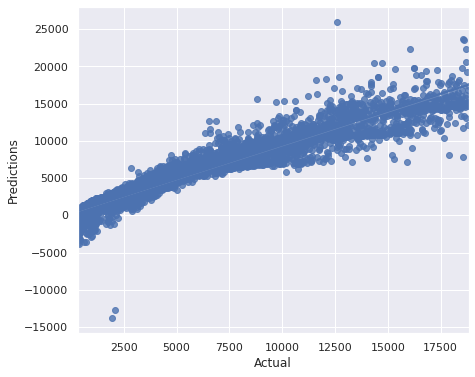

In [ ]:
sns.regplot('Actual','Predictions',data=df);

**Ridge regression model**


In [ ]:
rg_model = Ridge(alpha=100, tol=0.0001, random_state=42)
rg_model.fit(train_X,train_y)

preds = rg_model.predict(test_X)

In [ ]:
print("r2_score:",r2_score(test_y,preds))
print("RMSE",np.sqrt(mean_squared_error(test_y,preds)))

r2_score: 0.925511136795047
RMSE 1092.7954040020645


**LASSO Regression model**

In [ ]:
ls_model =  Lasso(alpha=5.1, positive=True, selection='random', random_state=42)
ls_model.fit(train_X,train_y)

pred_y = ls_model.predict(test_X)

In [ ]:
print("r2_score:",r2_score(test_y,pred_y))
print("RMSE",np.sqrt(mean_squared_error(test_y,pred_y)))

r2_score: 0.9074275441065675
RMSE 1218.2434339986


**Elastic Net model**

In [ ]:
en_model = ElasticNet(alpha= 0.1, l1_ratio=0.9, selection='random', random_state=42)
en_model.fit(train_X,train_y)
y_pred = en_model.predict(test_X)

print("r2_score:",r2_score(test_y,y_pred))
print("RMSE",np.sqrt(mean_squared_error(test_y,y_pred)))

r2_score: 0.9239402815960734
RMSE 1104.2579718419365


**Stochastic Gradient Descent model**

In [ ]:
sg_model = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sg_model.fit(train_X,train_y)
predicted = sg_model.predict(test_X)

print("r2_score:",r2_score(test_y,predicted ))
print("RMSE",np.sqrt(mean_squared_error(test_y,predicted )))

r2_score: 0.9247512265227142
RMSE 1098.355424786108




**Random Forest model**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_X,train_y)
predict = rf_model.predict(test_X)

print("r2_score:",r2_score(test_y,predict))
print("RMSE",np.sqrt(mean_squared_error(test_y,predict)))

r2_score: 0.9771255938372606
RMSE 605.5752271211843


**Xgboost model**

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb_model.fit(train_X,train_y)
preds_y = xgb_model.predict(test_X)

print("r2_score:",r2_score(test_y,preds_y))
print("RMSE",np.sqrt(mean_squared_error(test_y,preds_y)))

[12:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score: 0.9723096786041848
RMSE 666.2806256353867


##**Evaluation of the model**

**Hyperparameter tuning of Random Forest model**

Beacause the Random Forest model got the best result - the smallest RMSE (605,57) and the highest R-Squared (0.97) I may check if the results can be improved. So I use GridSearch to find the best hyperparameters of Random Forest model.

**GridSearch**

In [ ]:
params = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth": [2, 3, 5, 10],
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid = GridSearchCV(rf_model, params, cv=4, n_jobs=-1)
grid = grid.fit(train_X, train_y)

print("Our optimized Random Forest model is:")
grid.best_estimator_

Our optimized Random Forest model is:


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#optimum parameter:
grid.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 15}

Now I build the final model with received grid.best_params:

In [ ]:
rf_grid = RandomForestRegressor(max_depth=10, max_features = 'auto', min_samples_leaf=1, min_samples_split=3, n_estimators=15, random_state=42)
rf_grid.fit(train_X,train_y)

predict_y = rf_grid.predict(test_X)

In [ ]:
print("r2_score:",r2_score(test_y,predict_y))
#Root mean squared error(RMSE)
print("RMSE",np.sqrt(mean_squared_error(test_y,predict_y)))
#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(test_y,predict_y))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(test_y,predict_y))

r2_score: 0.9610303886633792
RMSE 790.4169116597968
MAE 402.22153565962765
MSE 624758.894237811


In [ ]:
df2 = pd.DataFrame({'Actual':test_y,'Predictions':predict_y})
df2['Predictions']= round(df2['Predictions'])
df2.head()

,Actual,Predictions
34704,874,928.0
21099,9273,7635.0
23685,11743,11546.0
39200,1064,1037.0
35560,906,734.0


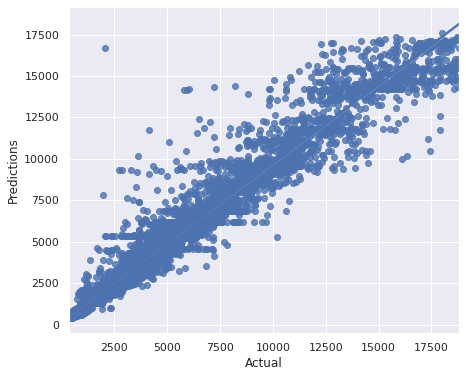

In [ ]:
sns.regplot('Actual','Predictions',data=df2);

**Significance of variables**

In [ ]:
Importance = pd.DataFrame({"Importance": rf_grid.feature_importances_}, index = X.columns)
Importance

,Importance
carat,0.022446
depth,0.003059
table,0.000688
x,0.005541
y,0.201664
z,0.001368
volume,0.670903
volume_from_density,0.017045
cut_Good,0.000054
cut_Ideal,0.000239


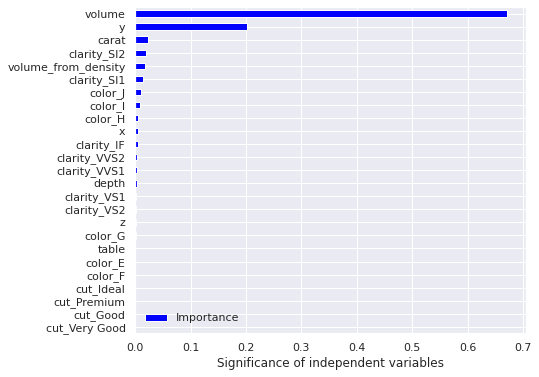

In [ ]:
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh", color = "blue")
plt.xlabel("Significance of independent variables")
plt.show()

##**Conclusions**


In this project I have used several linear regression algorithms for diamonds price prediction. I have used the common linear regression models like Ridge, Lasso, ElasticNet and other ones like Random Forest, Gradient Descsent and XGBoosts as well. The best model turned out to be a Random Forest one. I have achived the smallest RMSE (605,57) and the highest R-Squared (0.97). I have also used GridSearch to find the best hyperparameters of Random Forest model and to check if that result can be improved. By virtue of the GridSearch method I did not manage to improve the result since I got slightly worse one - the RMSE (790,41) and the R-Squared (0.96). Additionally the most significance variable in the analysis is "volume".